In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import sweetviz

In [2]:
df = pd.read_excel("airlines_dataset.xlsx")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [5]:
pro = sweetviz.analyze(df)

In [6]:
pro.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [247]:
report = ProfileReport(df,title="Airlines Dataset")

In [129]:
# report.to_file("Airlines.html")

In [248]:
report.to_widgets()

From above profiling report in overview tab we can see there are 11 variable in which 10 are categorical and 1 is numeric. Number of observation is 10683 and there are 2 missing cells. Similarly, there are 195(1.8%) duplicate row. In variable tab, for each and every variable that is present in dataframe it will analysis how many distinct , missing data are there and for numeric data we can aslo see the minimum , macimum , zeros, and negative. We can also toggle details of statistics, Histogram, common values and extreme values. From interaction we can see how are the behaviour with respect to the distribution. In Correlation tab all the different kind of correlation have been applied.In missing values tab we can visualize the missing values. We can also see the sample of data i.e. top and bottom 10 rows.  From duplicate tab we can also see the duplicated values(datas).

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [132]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

In [133]:
print(df['Date_of_Journey'].min())
print(df['Date_of_Journey'].max())

2019-01-03 00:00:00
2019-12-06 00:00:00


The Airline data set consists of flight arrival, departure, Route, etc Airline details for all commercial flights from 2019-01-03 to 2019-12-06.The approximately 10683 records (xlsx format), occupy 918.0 KiB space.The aim of the data expo is to provide a summary of important features of the data set. This is intentionally vague in order to allow different entries to focus on different aspects of the data. but here are a few ideas to get started:

* When is the best time of day/day of week/time of year to fly to min price?
* When Do older planes suffer more delays?
* How does the people flying between different locations change over time and price?

In [134]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Working with date and time

In [135]:
# As Date_of_Journey is a date lets extract month, day and year
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day
df['month_of_Journey'] = df['Date_of_Journey'].dt.month
df['Year_of_Journey'] = df['Date_of_Journey'].dt.year

In [136]:
df.duplicated().sum()

220

In [137]:
df[df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Year_of_Journey
683,Jet Airways,2019-01-06,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376,6,1,2019
1061,Air India,2019-05-21,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231,21,5,2019
1348,Air India,2019-05-18,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392,18,5,2019
1418,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368,6,6,2019
1674,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303,24,3,2019


<AxesSubplot:>

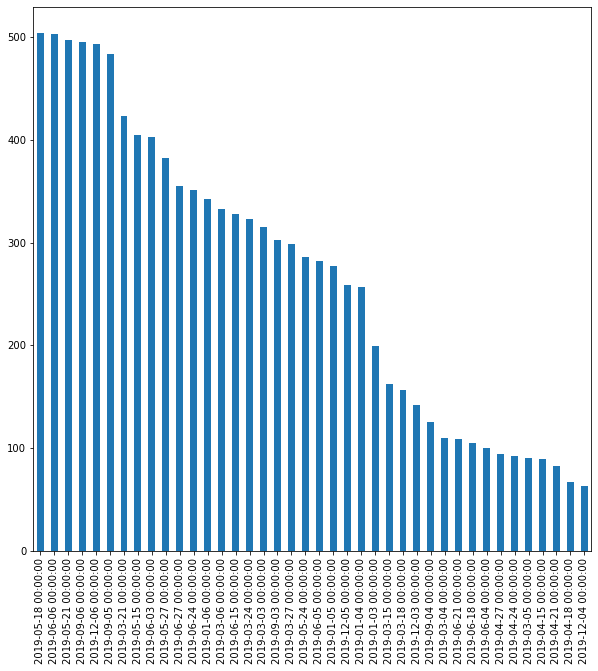

In [138]:
df['Date_of_Journey'].value_counts().plot(kind="bar",figsize=(10,10))

In [139]:
df.nlargest(5,columns='Price')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Year_of_Journey
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,3,1,2019
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,3,1,2019
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,3,1,2019
1478,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3,2019
2618,Jet Airways,2019-03-18,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3,2019


In [140]:
#lets drop the Date_of_journey form datafram
df.drop(columns='Date_of_Journey',inplace=True)

In [141]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Year_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [142]:
df.size

138879

In [143]:
df.loc[df['Year_of_Journey']==2019].size

138879

In [144]:
# as all the year on the data frame are of 2019 lets drop the 2019 column
df.drop(columns='Year_of_Journey',inplace=True)

In [145]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [146]:
#working with departure time
df['Dep_Time_hours'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Time_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [147]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [148]:
#lets drop Dep_Time
df.drop(columns='Dep_Time',inplace=True)

In [149]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [150]:
# Working with arrival time
df['Arrival_Time_hours'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Time_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute



In [151]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [152]:
#lets drop arrival time aslo
df.drop(columns='Arrival_Time',inplace=True)

In [153]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [154]:
# from Duration lets extract hours and minutes
minute_list =[]
hour_list = []
for i in list(df['Duration']):
    data_split = i.split()
    if len(data_split) == 2:
        hour_list.append(int(data_split[0].replace("h","")))
        minute_list.append(int(data_split[1].replace("m","")))
    else:
        if 'm' not in data_split[0]:
#             minute_list.append(int(data_split[0].replace("m","")))
            hour_list.append(int(data_split[0].replace("h","")))
            minute_list.append(0)
        else:
            hour_list.append(0)
            minute_list.append(int(data_split[0].replace("m","")))

In [155]:
print('HourLength',len(hour_list))
print('MinuteLength',len(minute_list))
print('DataLength',len(df))

HourLength 10683
MinuteLength 10683
DataLength 10683


In [156]:
#as length are matched we can now add columns
df['Duration_hour'] =  hour_list
df['Duration_minute'] = minute_list

In [157]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [158]:
#lets drop duration column
df.drop(columns='Duration',inplace=True)

In [159]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


## Working with Categorical data

In [160]:
#lets see the additional info 
len(df[df.Additional_Info == 'No info'])# from here we can see more then 50% of data set has no info data so we can drop it
df.drop(columns='Additional_Info',inplace=True)

In [161]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,3,1,16,50,21,35,4,45


In [162]:
# from Route and total_stops we can see they are related to each other so we can drop Route columns 
df.drop(columns='Route', inplace=True)

In [163]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1 stop,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1 stop,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1 stop,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1 stop,8625,27,5,11,25,19,15,7,50


In [164]:
df.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            1
Price                  0
Day_of_Journey         0
month_of_Journey       0
Dep_Time_hours         0
Dep_Time_minute        0
Arrival_Time_hours     0
Arrival_Time_minute    0
Duration_hour          0
Duration_minute        0
dtype: int64

In [165]:
#from here we can see that we have one nan value in Total_Stop so lets drop it
df.dropna(inplace=True)
df.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price                  0
Day_of_Journey         0
month_of_Journey       0
Dep_Time_hours         0
Dep_Time_minute        0
Arrival_Time_hours     0
Arrival_Time_minute    0
Duration_hour          0
Duration_minute        0
dtype: int64

In [166]:
df[['Total_Stops']].value_counts()

Total_Stops
1 stop         5625
non-stop       3491
2 stops        1520
3 stops          45
4 stops           1
dtype: int64

In [167]:
#we know that more the stops the more will be the price so, we can give them in rank so 
# we can say this is orbinal data so, lets label encode it
encode_stops ={}
df.Total_Stops.replace(to_replace="1 stop",value="1 stops",inplace=True)
for index,value in enumerate (df['Total_Stops'].unique()):
    print(index,value)
    encode_stops[value] = index

0 non-stop
1 2 stops
2 1 stops
3 3 stops
4 4 stops


In [168]:
encode_stops['2 stops'] =2
encode_stops['1 stops'] =1
encode_stops

{'non-stop': 0, '2 stops': 2, '1 stops': 1, '3 stops': 3, '4 stops': 4}

In [169]:
df

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stops,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stops,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,3,1,11,30,14,10,2,40


In [170]:
df.Total_Stops.replace(encode_stops,inplace=True) #replacing the value of stops

In [171]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


## One hot encoding on nominal data 

In [172]:
df[['Airline']].value_counts()

Airline                          
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
dtype: int64

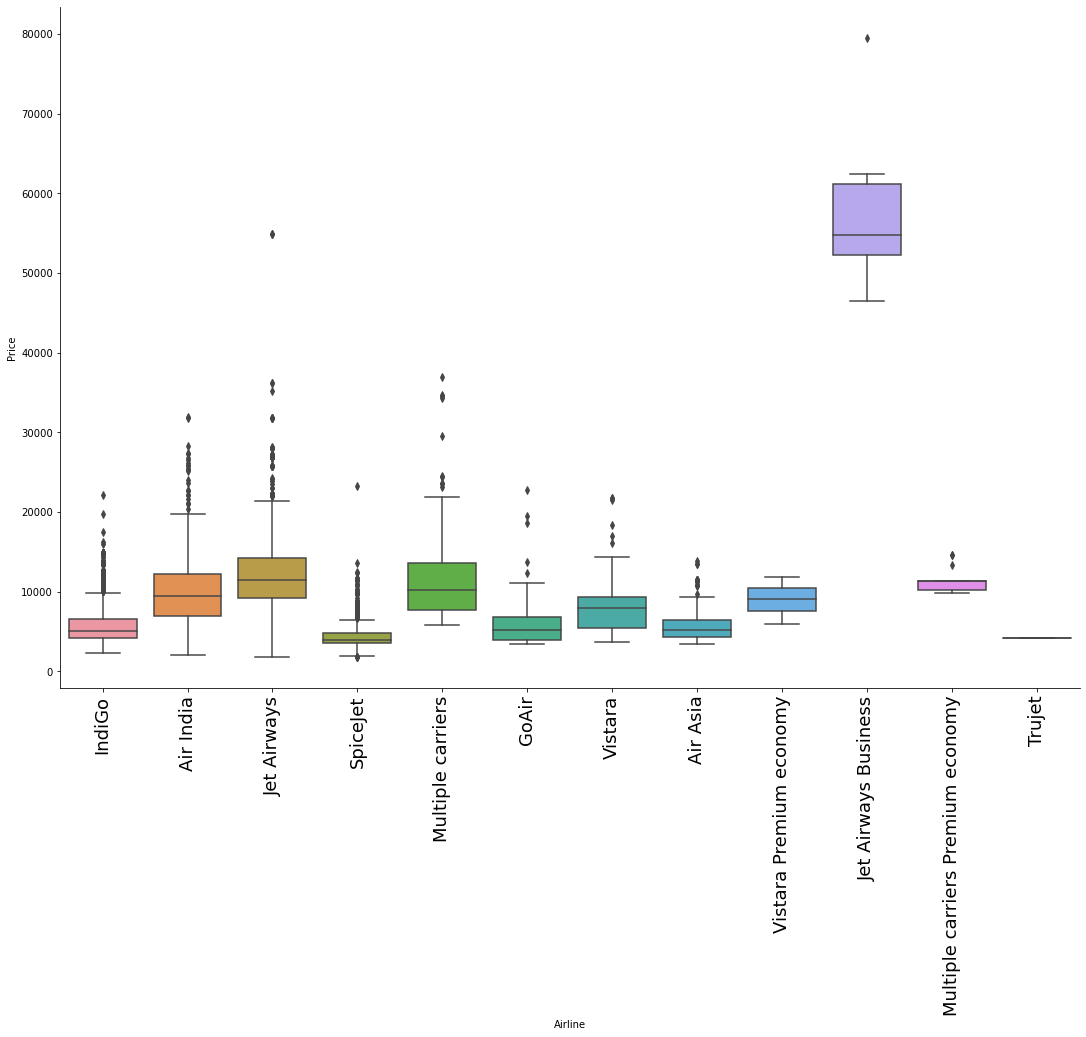

In [173]:

da = sns.catplot(x="Airline",y="Price",data=df,kind="box", height=10,aspect=1.5)
da.set_xticklabels( rotation=90,fontsize = 18)
#zet airways business has highest value remainig other almost has same 

In [174]:
Airline = pd.get_dummies(df['Airline'],drop_first=True) 

In [175]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [176]:
df[['Source']].value_counts()

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64

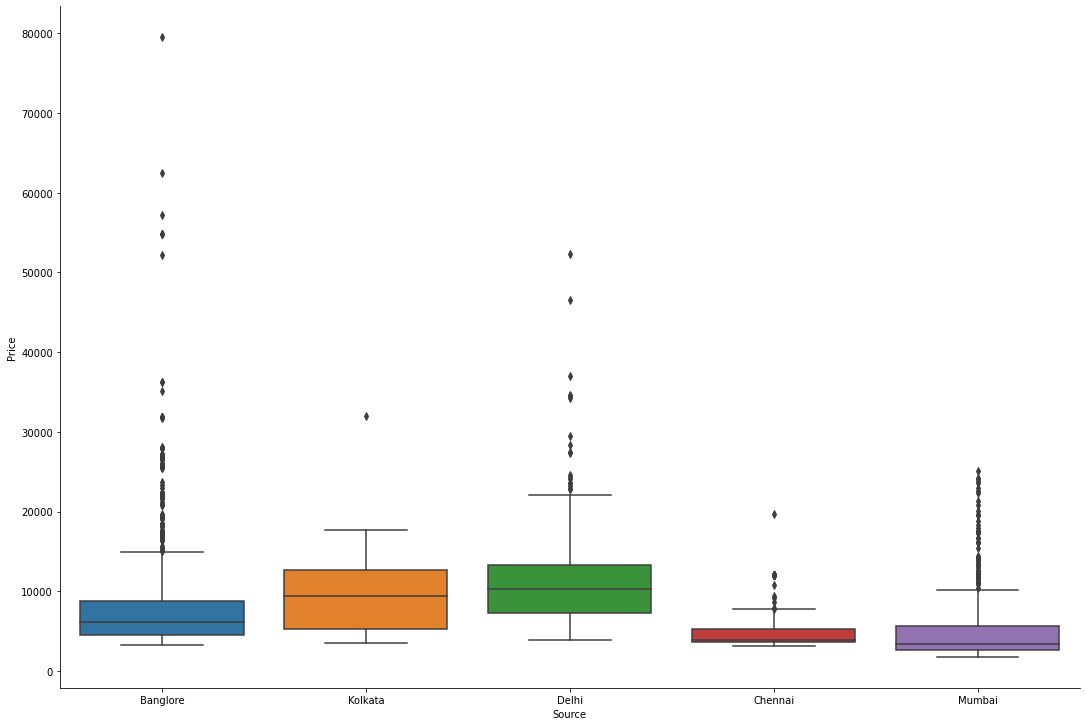

In [177]:
sns.catplot(x="Source",y="Price",data=df,kind="box",height=10,aspect=1.5)

In [178]:
Source = pd.get_dummies(df['Source'],drop_first=True)

In [179]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [180]:
df[['Destination']].value_counts()

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64

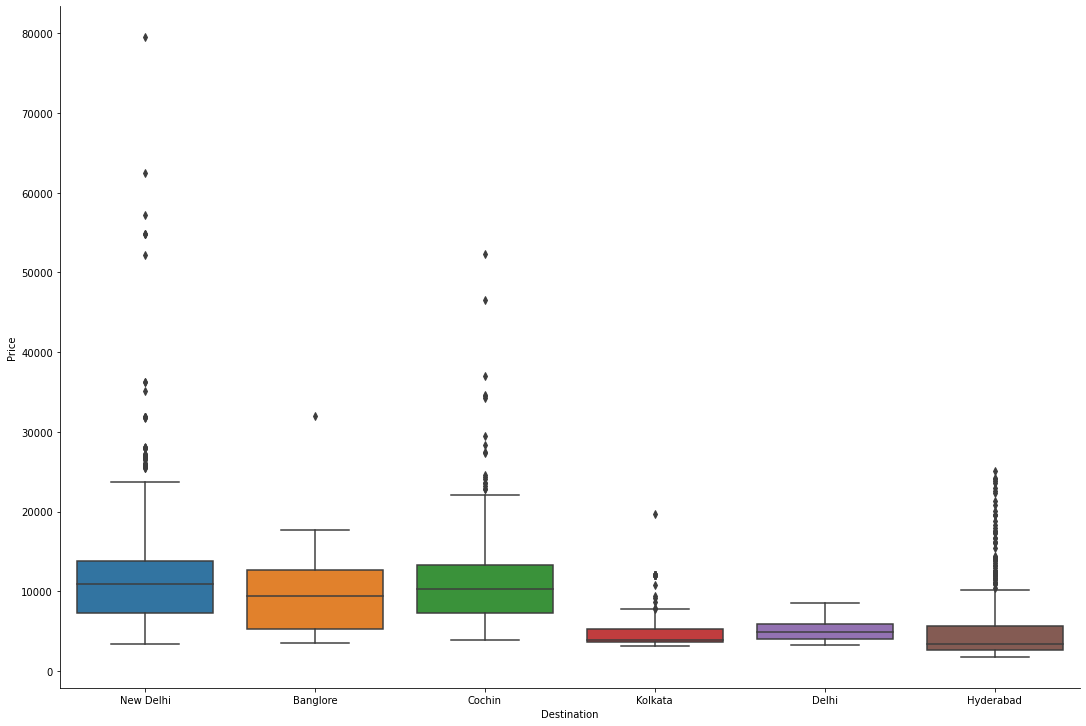

In [181]:
sns.catplot(x="Destination",y="Price",data=df,kind="box",height=10,aspect=1.5)

In [182]:
Destination = pd.get_dummies(df['Destination'],drop_first=True)

In [183]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


### Concatenating DataFrames

In [184]:
data_frame = df.copy()
df = pd.concat([df,Destination,Source,Airline],axis=1)

In [185]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [186]:
#lets drop Airline, Source and Destination column
df.drop(columns=['Airline','Source','Destination'],inplace=True)

In [187]:
df

,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,19,55,22,25,2,30,...,0,0,0,0,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,0,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,1,0,0,0,0,0,0,0
10681,0,12648,3,1,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,1,0


In [188]:
df.dtypes #checking the data types

Total_Stops                          int64
Price                                int64
Day_of_Journey                       int64
month_of_Journey                     int64
Dep_Time_hours                       int64
Dep_Time_minute                      int64
Arrival_Time_hours                   int64
Arrival_Time_minute                  int64
Duration_hour                        int64
Duration_minute                      int64
Cochin                               uint8
Delhi                                uint8
Hyderabad                            uint8
Kolkata                              uint8
New Delhi                            uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways

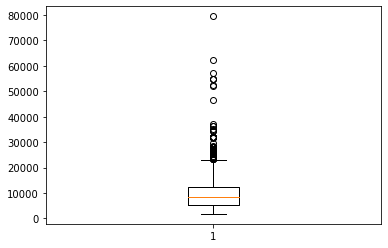

In [189]:
plt.boxplot(df['Price']);

In [190]:
df.head()

,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,1,0,0,0,0,0,0,0,0


In [191]:
y = df['Price']

### check outliers using z-score


In [192]:
# z-score = Xi-mean/sd
outliers_dic={}
def check_outliers(data):
    mean = np.mean(data)
    sd = np.std(data)
    for index,value in enumerate (data):
        z_score = (value - mean)/sd
        if z_score>3:
            outliers_dic[index] =value

In [193]:
check_outliers(y)

In [194]:
#outliers index and values
print('Index = ',outliers_dic.keys())
print('values = ',outliers_dic.values())

Index =  dict_keys([123, 396, 486, 510, 597, 628, 657, 785, 826, 936, 946, 959, 975, 1196, 1246, 1341, 1424, 1466, 1478, 1629, 1654, 1785, 1918, 2055, 2099, 2108, 2495, 2556, 2618, 2635, 2693, 2924, 3032, 3111, 3257, 3400, 3535, 3700, 4012, 4521, 4676, 4829, 5013, 5136, 5372, 5439, 5662, 5701, 5710, 5719, 5738, 5745, 5856, 5986, 6314, 6407, 6576, 6588, 6605, 6991, 7351, 7356, 7377, 7537, 7554, 7617, 7713, 7724, 7756, 7902, 8020, 8080, 8451, 8470, 8536, 8598, 8856, 8940, 8957, 8990, 9019, 9192, 9238, 9631, 9714, 9973, 10051, 10112, 10159, 10181, 10188, 10352, 10363, 10382, 10438, 10510])
values =  dict_values([27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 22950, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735

### Droping the outliers

In [195]:
df.drop(index=outliers_dic.keys(),inplace=True)

In [196]:
df.reset_index(drop=True)


,Total_Stops,Price,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,0,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,0,4107,4,9,19,55,22,25,2,30,...,0,0,0,0,0,0,0,0,0,0
10582,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,0,0,0,0,0,0,0
10583,0,7229,27,4,8,20,11,20,3,0,...,0,0,1,0,0,0,0,0,0,0
10584,0,12648,3,1,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,1,0


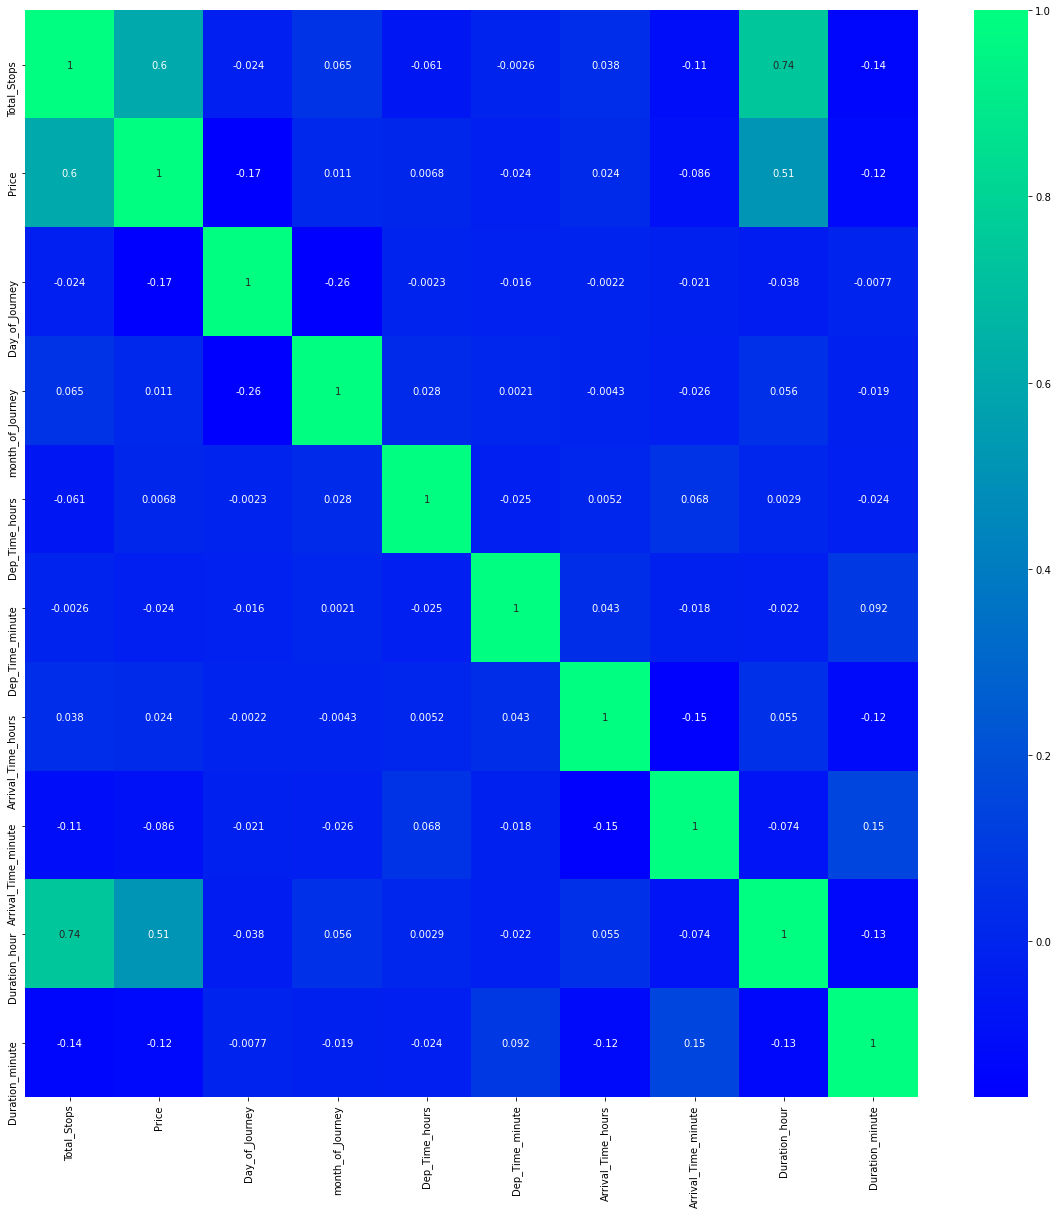

In [197]:
plt.figure(figsize=(20,20)) #correlation between Explanatory variable and  response variable
sns.heatmap(data_frame.corr(),cmap="winter",robust=True,annot=True);

In [199]:
#final X and y form our dataset
X.dtypes

Total_Stops                          int64
Day_of_Journey                       int64
month_of_Journey                     int64
Dep_Time_hours                       int64
Dep_Time_minute                      int64
Arrival_Time_hours                   int64
Arrival_Time_minute                  int64
Duration_hour                        int64
Duration_minute                      int64
Cochin                               uint8
Delhi                                uint8
Hyderabad                            uint8
Kolkata                              uint8
New Delhi                            uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple ca

In [78]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10586, dtype: int64

In [201]:
#Extra tree regressor is used to find how much the feature are important for our output variable
from sklearn.ensemble import ExtraTreesRegressor

In [202]:
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

In [203]:
dir(etr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'decision_path',
 'estimator_params

In [204]:
features = etr.feature_importances_

In [205]:
features

array([2.79666736e-01, 1.05156136e-01, 5.86888273e-02, 2.40057734e-02,
       2.28106194e-02, 2.24071834e-02, 1.96934588e-02, 1.19521265e-01,
       1.64435142e-02, 1.21206515e-02, 1.85853185e-02, 6.14789046e-03,
       6.64125726e-04, 1.39400405e-02, 6.65042461e-04, 1.25796412e-02,
       9.92161636e-03, 6.11684309e-03, 1.29847577e-02, 2.35963479e-03,
       2.26189846e-02, 1.56841268e-01, 2.32540983e-02, 2.06619753e-02,
       1.11745207e-03, 4.13795900e-03, 1.35515684e-04, 6.58553858e-03,
       1.68133236e-04])

<AxesSubplot:>

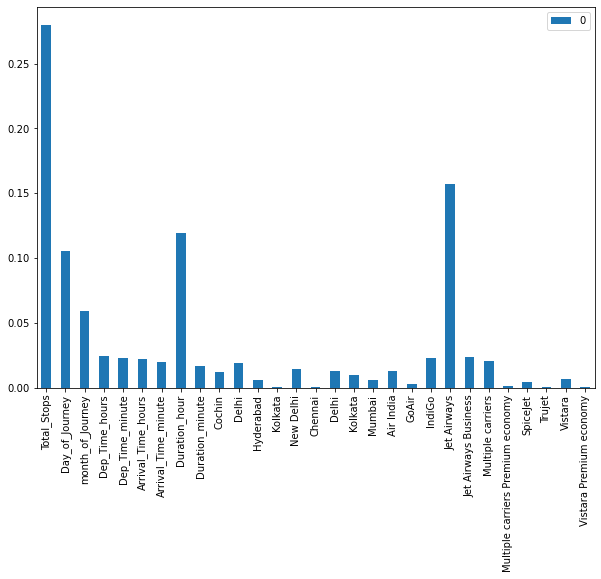

In [206]:
pd.DataFrame(features,index=X.columns).plot(kind="bar",figsize=(10,7)) #from here we can conclude that total stop feature is very important in comapred to other


In [207]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=23)


In [208]:
X_train.head()

,Total_Stops,Day_of_Journey,month_of_Journey,Dep_Time_hours,Dep_Time_minute,Arrival_Time_hours,Arrival_Time_minute,Duration_hour,Duration_minute,Cochin,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
1297,1,5,12,16,30,9,20,16,50,0,...,0,0,1,0,0,0,0,0,0,0
7188,1,24,3,19,45,16,20,20,35,0,...,0,0,1,0,0,0,0,0,0,0
3810,0,21,5,9,45,12,35,2,50,0,...,0,0,0,0,0,0,0,0,1,0
1247,1,3,6,13,0,18,50,5,50,1,...,0,0,1,0,0,0,0,0,0,0
1234,1,18,5,14,0,19,0,5,0,1,...,0,0,1,0,0,0,0,0,0,0


In [238]:
X.columns

Index(['Total_Stops', 'Day_of_Journey', 'month_of_Journey', 'Dep_Time_hours',
       'Dep_Time_minute', 'Arrival_Time_hours', 'Arrival_Time_minute',
       'Duration_hour', 'Duration_minute', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy'],
      dtype='object')

In [209]:
from sklearn.ensemble import RandomForestRegressor

In [210]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [211]:
predict = model.predict(X_test)

In [212]:
y_test

693       7774
5442      9443
10236    10262
9426     18286
6771      2071
         ...  
4207      6565
8098     13587
5840      8372
6865      5397
3262      2227
Name: Price, Length: 2118, dtype: int64

In [213]:
model.score(X_train,y_train)

0.9466979968281319

In [214]:
model.score(X_test,y_test)

0.817855340572222

In [216]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mse",mean_squared_error(y_test,predict))
print("mae",mean_absolute_error(y_test,predict))

mse 3019357.80627292
mae 1113.8651655676713


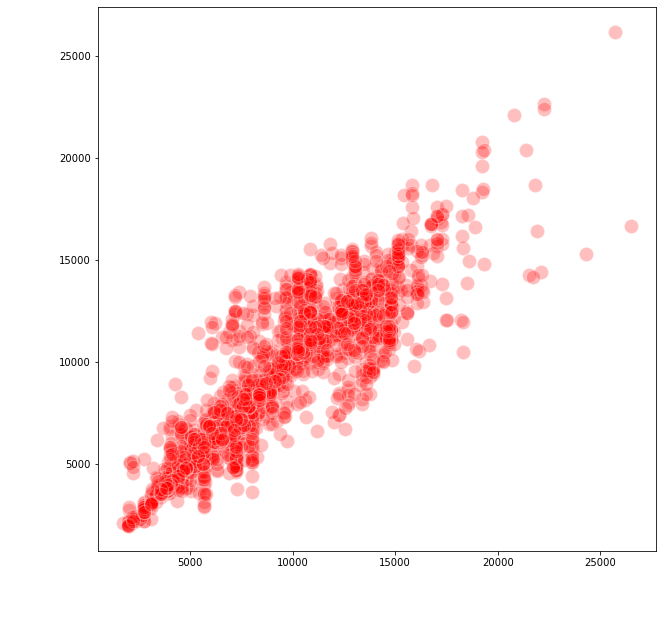

In [217]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= y_test,y=predict,alpha=0.25,color='red',s=200)
plt.xlabel("Test",size=50,color="white");
plt.ylabel("Predict",size=50,color="white");


In [218]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict))

0.817855340572222


### Hyperparameter tuning

In [219]:
#RandomizedSearchCV
hyper = {
    'n_estimators':[i for i in np.linspace(100,1200,10,dtype='int')],
    'max_depth':[ i for i in np.linspace(5,40,8,dtype='int')],
    'min_samples_split':[1,2,4,5,10,15,30,50,100],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features' : ["auto", "sqrt", "log2"],
}

In [220]:
hyper

{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
 'min_samples_split': [1, 2, 4, 5, 10, 15, 30, 50, 100],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [221]:
mdl = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_cv = RandomizedSearchCV(estimator=model,param_distributions=hyper,n_jobs=-1,cv=5,n_iter=10,verbose=1,random_state=100)

In [222]:
# dir(random_cv)

In [223]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 4, 5, 10,
                                                              15, 30, 50, 100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=100, verbose=1)

In [224]:
random_cv.best_params_

{'n_estimators': 833,
 'min_samples_split': 30,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 25}

In [225]:
best_param_random = random_cv.best_estimator_

In [226]:
pre = best_param_random.predict(X_test)

<AxesSubplot:xlabel='Price'>

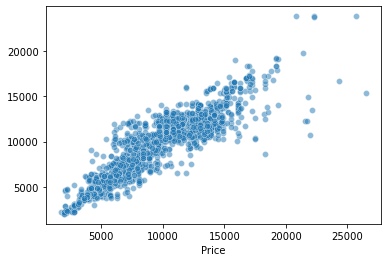

In [227]:
plt.figure()
sns.scatterplot(x=y_test,y = pre,alpha=0.5)

In [229]:

print("mse",mean_squared_error(y_test,pre))
print("mae",mean_absolute_error(y_test,pre))
print(r2_score(y_test,pre))

mse 2602891.8755560247
mae 1098.3049134337957
0.842978909880935


In [240]:
random_cv.best_params_ 

{'n_estimators': 833,
 'min_samples_split': 30,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 25}

In [245]:
from sklearn.model_selection import GridSearchCV
parameter ={
   'n_estimators':[random_cv.best_params_['n_estimators'],random_cv.best_params_['n_estimators']+10,
                  random_cv.best_params_['n_estimators']+15,
                  random_cv.best_params_['n_estimators']+20,
                    random_cv.best_params_['n_estimators']+30,
                   random_cv.best_params_['n_estimators']-10,
                  random_cv.best_params_['n_estimators']-15,
                  random_cv.best_params_['n_estimators']-20,
                    random_cv.best_params_['n_estimators']-30,
                  ],
'min_samples_split':[
    30,30+3,30+5,30+7,
    30-3,30-3,30-7],
    'min_samples_leaf':[1,2,3,4,5,6],
    'max_depth':[22,23,24,25,26,27,28,29],
    'max_features': ['auto'],
}

In [246]:
gs = GridSearchCV(estimator=model,param_grid=parameter,n_jobs=-1,cv=5,verbose=1)

In [ ]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 3024 candidates, totalling 15120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 64.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 103.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 149.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 356.6min


In [232]:
import pickle 
file = open("model.pkl",'wb')
pickle.dump(random_cv,file)